In [1]:
! pip install sklearn
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('acetylcholinesterase_bioactivity_data_3class_pIC50_pubchem_fp')
df

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,AUTOGEN_20210718194557722,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.124939
1,AUTOGEN_smiles_1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.000000
2,AUTOGEN_smiles_2,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.301030
3,AUTOGEN_20210718215459405,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.522879
4,AUTOGEN_smiles_5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,AUTOGEN_smiles_5039,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000
5041,AUTOGEN_smiles_5040,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.809668
5042,AUTOGEN_smiles_5041,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.165579
5043,AUTOGEN_smiles_5042,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [25]:
X= df.drop(['pIC50', 'Name'], axis = 1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5041,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5042,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5043,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X = X.fillna(X.mean())

In [27]:
Y = df.pIC50
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
5040    5.000000
5041    4.809668
5042    4.165579
5043         NaN
5044         NaN
Name: pIC50, Length: 5045, dtype: float64

In [28]:
predictions=True

In [29]:
print(X.shape)
print(Y.shape)

(5045, 881)
(5045,)


In [30]:
#removing low variances
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = sel.fit_transform(X)
X

array([[0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0]], dtype=int64)

In [31]:
X.shape


(5045, 140)

In [32]:
#Split data into training and testing data with 8/2 ratio

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [33]:
regressor = RandomForestRegressor(n_estimators = 110, random_state = 0)
regressor.fit(X_train, Y_train)
r2 = regressor.score(X_test, Y_test)
r2

0.4012754582973228

In [39]:
Y_pred = regressor.predict(X_test)

In [40]:
Y_pred

array([4.8184768 , 6.27349737, 6.35454039, ..., 5.38606713, 7.96057141,
       6.50616945])

In [41]:
print(Y_pred.size)
print(Y_test.size)
print(Y_train.size)
print(X_train.size)
print(X_test.size)

1009
1009
4036
565040
141260


In [42]:
Y_pred_df = pd.DataFrame(Y_pred)

In [43]:
Y_pred_df

,0
0,4.818477
1,6.273497
2,6.354540
3,6.267653
4,7.440760
...,...
1004,6.015510
1005,8.138600
1006,5.386067
1007,7.960571


C:\Users\ngkha\anaconda3\envs\my-rdkit-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

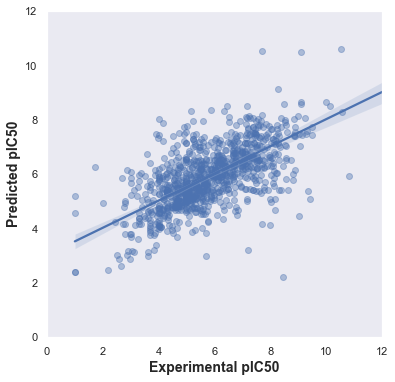

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("dark")

scplt = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
scplt.figure.set_size_inches(6, 6)
scplt.set_xlabel('Experimental pIC50', fontsize=14, fontweight='bold')
scplt.set_ylabel('Predicted pIC50', fontsize=14, fontweight='bold')
scplt.set_xlim(0, 12)
scplt.set_ylim(0, 12)

plt.show

In [45]:
plt.savefig('pIC50_experimental_vs_predicted')

<Figure size 432x288 with 0 Axes>